In [559]:
import pandas as pd

In [560]:
wiki_url = "https://en.wikipedia.org/wiki/List_of_mass_shootings_in_the_United_States"

In [561]:
#load the data from wikipedia
wiki_dfs = pd.read_html(wiki_url)

In [562]:
# remove the last item (wikipedia related items)
dont_care = wiki_dfs.pop()

In [563]:
#remove wiki's summary cells 
del wiki_dfs[13]
del wiki_dfs[13] #cell 14 becomes 13 after the last command, so it looks dumb

In [564]:
#fix the one table where they didn't label description
wiki_dfs[11]["Description"] = wiki_dfs[11]["Unnamed: 5"]
wiki_dfs[11].drop(columns=['Unnamed: 5'], inplace=True)

In [565]:
#join (union) all of  the dfs ( tables from the wikipedia table ) to one df
#list comprehension used in the concat function rather than listing all dfs manually
all_shootings_df  = pd.concat([  df for df in wiki_dfs ])

In [566]:
#set index to date
#all_shootings_df = all_shootings_df.set_index("Date")

In [567]:
#split out the dead notes
all_shootings_df[['Dead New','Dead Notes 1','Dead Notes 2']] = all_shootings_df.Dead.str.split("[",expand=True)
all_shootings_df['Dead Notes 1'] = all_shootings_df['Dead Notes 1'].str.replace("]", "")
all_shootings_df['Dead Notes 2'] = all_shootings_df['Dead Notes 2'].str.replace("]", "")

In [568]:
#fix the dates - hacky
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 21–25, 1969', 'May 21, 1969–May 25, 1969')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('July 23–24, 1968', 'July 23, 1968–July 24, 1969')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('July 27–29, 1999', 'July 27, 1999–July 29, 1999')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('January 19–20, 2010', 'January 19, 2010–January 20, 2010')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('February 3–12, 2013', 'February 3, 2013–February 12, 2013')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 31 – June 1, 1921', 'May 31, 1921–June 1, 1921')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 5 –May 6, 2016', 'May 5, 2016–May 6, 2016')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('April 21 –April 22, 2016', 'April 21, 2016–April 22, 2016')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('May 30–June 4, 2018', 'May 30, 2018–June 4, 2018')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('March 7 – 8, 2016', 'March 7, 2016–March 8, 2016')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('April 13 –April 18, 2017', 'April 13, 2017–April 18, 2017')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('June 17–18, 1990', 'June 17, 1990–June 18, 1990')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('February 16 – October 23, 2002', 'February 16, 2002–October 23, 2002')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('January 1923','January 01, 1923')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('December 22–28, 1987','December 22, 1987– December 28, 1987')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('June 21–22, 1922','June 21, 1922–June 22, 1922')
all_shootings_df['Date'] = all_shootings_df.Date.str.replace('July 2–4, 1999','July 2, 1999 – July 4, 1999')

In [569]:
#find start and end dates 
all_shootings_df['Date']=all_shootings_df.Date.str.strip()
all_shootings_df['Date']=all_shootings_df.Date.str.replace("-","–")
all_shootings_df['Date']=all_shootings_df.Date.str.replace("–","–")
all_shootings_df['Date']=all_shootings_df.Date.str.replace("–","–")
all_shootings_df['Date']=all_shootings_df.Date.str.replace("–","–")
all_shootings_df[['Date Start','Date End']]=all_shootings_df.Date.str.split("–",expand=True)
all_shootings_df['Date Start']=all_shootings_df['Date Start'].str.strip()
all_shootings_df['Date End']=all_shootings_df['Date End'].str.strip()

In [570]:
# change dates to actual dates
all_shootings_df['Date Start'] = pd.to_datetime(all_shootings_df['Date Start'], format='%B %d, %Y')
all_shootings_df['Date End'] = pd.to_datetime(all_shootings_df['Date End'], format='%B %d, %Y')

In [571]:
#delete the orginal date 
all_shootings_df.drop(columns=['Date'], inplace=True)

In [572]:
# replace dead new with dead and split dead min and max
all_shootings_df['Dead'] = all_shootings_df['Dead New']

In [573]:
#drop dead new
all_shootings_df.drop(columns=['Dead New'], inplace=True)

In [574]:
#split dead min and max
all_shootings_df[['Dead Min','Dead Max']] = all_shootings_df.Dead.str.split("-",expand=True)

In [575]:
#Drop Dead 
all_shootings_df.drop(columns=['Dead'], inplace=True)

In [576]:
#split out the Injured notes
all_shootings_df[['Injured New','Injured Notes 1','Injured Notes 2']] = all_shootings_df.Injured.str.split("[",expand=True)
all_shootings_df['Injured Notes 1'] = all_shootings_df['Injured Notes 1'].str.replace("]", "")
all_shootings_df['Injured Notes 2'] = all_shootings_df['Injured Notes 2'].str.replace("]", "")
# replace dead new with dead and split dead min and max
all_shootings_df['Injured'] = all_shootings_df['Injured New']
all_shootings_df.drop(columns=['Injured New'], inplace=True)
#split Injured min and max
all_shootings_df[['Injured Min','Injured Max']] = all_shootings_df.Injured.str.split("-",expand=True)
#injured has some unknowns and a + on some columns
all_shootings_df['Injured Min'] = all_shootings_df['Injured Min'].str.replace("+", "")
all_shootings_df['Injured Min'] = all_shootings_df['Injured Min'].str.replace("unknown", "0")

#Drop Injured 
all_shootings_df.drop(columns=['Injured'], inplace=True)

In [577]:
#average the dead as float
all_shootings_df['Dead Average'] = all_shootings_df[['Dead Min','Dead Max']].astype(float).mean(axis=1)

In [578]:
#average the injured as float
all_shootings_df['Injured Average'] = all_shootings_df[['Injured Min','Injured Max']].astype(float).mean(axis=1)

In [579]:
all_shootings_df.sort_index(inplace=True)

In [580]:
all_shootings_df = all_shootings_df.sort_values('Date Start').reset_index()

In [581]:
all_shootings_df.drop(columns=['index'], inplace=True)

# score , we can finally start to look at the data

In [582]:
#trim it down 
cleaned_shootings = all_shootings_df[['Date Start','Location', 'Dead Average', 'Injured Average']]

<AxesSubplot:xlabel='Date Start', ylabel='Dead Average'>

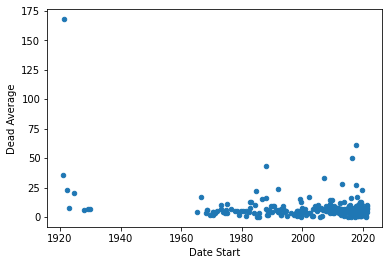

In [583]:
#quick plots to see what's up
cleaned_shootings.plot(kind='scatter',x='Date Start', y='Dead Average')
#cleaned_shootings.plot(kind='scatter',x='Date Start', y='Injured Average')

## Initial observations. 
### 1. WTF happened around 1920?
#### The Tulsa Race Massacre, AKA Black Wall Street. https://en.wikipedia.org/wiki/Tulsa_race_massacre  
### 2. No mass shootings from around WW1 until after WW2
#### US cuts steel production, makes sense. Post WW2 recovery 'boom' makes some sense as well, worth revisting this period for more explanation
### 3. We can probably split the data and look post 1960 due to the observations
## Notes:
### 1840 is when the first pin firing cartridge firearm started being sold, allowing for rapid reloading and quick firing, 1871 cartridges were brought to handguns. http://www.pbs.org/opb/historydetectives/technique/gun-timeline/

<AxesSubplot:xlabel='Date Start', ylabel='Dead Average'>

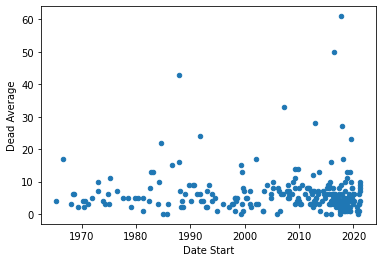

In [584]:
#lets just look post 1960
shootings_post_1960_df = cleaned_shootings[(cleaned_shootings['Date Start'] > '1960-01-01') ]
shootings_post_1960_df.plot(kind='scatter',x='Date Start', y='Dead Average')

In [585]:
#lets see what we can start to learn about the post 1960 shootings
shootings_post_1960_df.describe()

,Dead Average,Injured Average
count,250.000000,172.000000
mean,6.444000,8.738372
std,6.902568,31.930226
min,0.000000,0.000000
25%,3.000000,1.000000
50%,5.000000,4.000000
75%,7.750000,8.000000
max,61.000000,411.000000


### the previous graph looks like there is an increase in frequency and average dead over time, lets see if that's true or false

In [586]:
#create a DF with the index
shootings_post_1960_df_decade = shootings_post_1960_df.set_index('Date Start')
#group by the index ( year * 10 //10  groups by decade)
shootings_post_1960_df_group = shootings_post_1960_df_decade.groupby(by=[ shootings_post_1960_df_decade.index.year // 10 * 10])
shootings_post_1960_df_group.count()

,Location,Dead Average,Injured Average
Date Start,,,
1960,6,6,0
1970,17,17,0
1980,22,22,22
1990,32,32,32
2000,38,38,38
2010,121,121,72
2020,14,14,8


<AxesSubplot:xlabel='Date Start'>

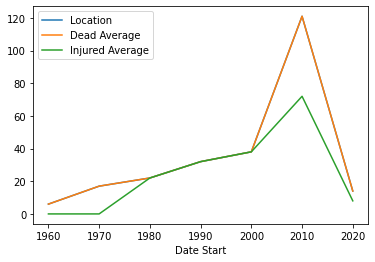

In [587]:
shootings_post_1960_df_group.count().plot()

### I guess this proves that point.  
#### interestingly enough, 2 years into the 2020's and we're at above the 1970's already

In [ ]:
## At this point I've realized that the number of mass shootings reported by this page is not all inclusi

In [588]:
#notes: I'm probably going to ignore these as I go
# - n1 in dead includes shooter, put in another column
# -nX in dead includes non-shooting related ( stabbing )- on the fence
# Dates - dates spanning multiple days will be limited to the start date
# location will get split to city / state as new columns
# where there is a range specified, the lowest of that range will be used 
# total is kind of not needed since I'm doing the averages. felt cute, thought I'd keep for now